In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# -------------------------------
# Parameters
# -------------------------------
IMG_SIZE = 48
NUM_CLASSES = 8
EPOCHS = 100
BATCH_SIZE = 128
DROPOUT_RATE = 0.3
LEARNING_RATE = 0.01
DATA_DIR = '/content/drive/My Drive/ec523 project/data/affectnet'
#DATA_DIR = 'preprocessed_data'  # Folder containing X_train.npy, y_train.npy, X_val.npy, y_val.npy, X_test.npy, y_test.npy

# -------------------------------
# Load Preprocessed Data (Training, Validation & Test Sets)
# -------------------------------
def load_data(data_dir):
    #X_test = np.load(os.path.join(data_dir, 'X_test.npy'))
    X_train = np.load(os.path.join(data_dir, 'X_train.npy'))
    y_train = np.load(os.path.join(data_dir, 'y_train.npy'))
    X_val = np.load(os.path.join(data_dir, 'X_val.npy'))
    y_val = np.load(os.path.join(data_dir, 'y_val.npy'))
    X_test = np.load(os.path.join(data_dir, 'X_test.npy'))
    y_test = np.load(os.path.join(data_dir, 'y_test.npy'))
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = load_data(DATA_DIR)
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (201347, 48, 48, 1) (201347, 8)
Validation set: (43155, 48, 48, 1) (43155, 8)
Test set: (43148, 48, 48, 1) (43148, 8)


In [11]:
# -------------------------------
# Build Model (Same Architecture as FER2013 Baseline)
# -------------------------------
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same', name="conv1"),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(32, (3, 3), activation='relu', padding='same', name="conv2"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), name="maxpool2"),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', padding='same', name="conv3"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), name="maxpool3"),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', padding='same', name="conv4"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), name="maxpool4"),
    Dropout(0.2),
    Flatten(),
    Dense(1024, activation='relu', name='fc1'),
    Dropout(DROPOUT_RATE),
    BatchNormalization(),
    Dense(NUM_CLASSES, activation='softmax', name='fcsoftmax')
])

sgd = SGD(learning_rate=LEARNING_RATE, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# -------------------------------
# Set Up Callbacks
# -------------------------------
#checkpoint = ModelCheckpoint("AffectNet_model_best.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')
checkpoint = ModelCheckpoint("AffectNet_CNN_Baseline_best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
rlrop = ReduceLROnPlateau(monitor='loss', mode='min', factor=0.5, patience=10, min_lr=0.00001, verbose=1)
callbacks_list = [checkpoint, rlrop]

In [12]:
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks_list,
    shuffle=True,
    validation_data=(X_val, y_val)
)

Epoch 1/100
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5469 - loss: 1.3539
Epoch 1: val_accuracy improved from -inf to 0.65594, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.5470 - loss: 1.3538 - val_accuracy: 0.6559 - val_loss: 0.9635 - learning_rate: 0.0100
Epoch 2/100
1572/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6482 - loss: 1.0080
Epoch 2: val_accuracy improved from 0.65594 to 0.66597, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 68s 21ms/step - accuracy: 0.6482 - loss: 1.0079 - val_accuracy: 0.6660 - val_loss: 0.9486 - learning_rate: 0.0100
Epoch 3/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6668 - loss: 0.9569
Epoch 3: val_accuracy improved from 0.66597 to 0.67598, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.6668 - loss: 0.9569 - val_accuracy: 0.6760 - val_loss: 0.9488 - learning_rate: 0.0100
Epoch 4/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6809 - loss: 0.9139
Epoch 4: val_accuracy improved from 0.67598 to 0.70868, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6809 - loss: 0.9139 - val_accuracy: 0.7087 - val_loss: 0.8355 - learning_rate: 0.0100
Epoch 5/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6918 - loss: 0.8785
Epoch 5: val_accuracy did not improve from 0.70868
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6918 - loss: 0.8785 - val_accuracy: 0.6856 - val_loss: 0.9163 - learning_rate: 0.0100
Epoch 6/100
1572/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6895 - loss: 0.8874
Epoch 6: val_accuracy did not improve from 0.70868
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6895 - loss: 0.8874 - val_accuracy: 0.7073 - val_loss: 0.8479 - learning_rate: 0.0100
Epoch 7/100
1571/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6931 - loss: 0.8763
Epoch 7: val_accuracy improved from 0.70868 to 0.71855, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6932 - loss: 0.8763 - val_accuracy: 0.7185 - val_loss: 0.8043 - learning_rate: 0.0100
Epoch 8/100
1571/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7084 - loss: 0.8316
Epoch 8: val_accuracy improved from 0.71855 to 0.72237, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7084 - loss: 0.8316 - val_accuracy: 0.7224 - val_loss: 0.7931 - learning_rate: 0.0100
Epoch 9/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7128 - loss: 0.8195
Epoch 9: val_accuracy did not improve from 0.72237
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7128 - loss: 0.8195 - val_accuracy: 0.7179 - val_loss: 0.8118 - learning_rate: 0.0100
Epoch 10/100
1572/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7138 - loss: 0.8167
Epoch 10: val_accuracy improved from 0.72237 to 0.72286, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7138 - loss: 0.8167 - val_accuracy: 0.7229 - val_loss: 0.7944 - learning_rate: 0.0100
Epoch 11/100
1571/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7195 - loss: 0.7944
Epoch 11: val_accuracy improved from 0.72286 to 0.72640, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.7195 - loss: 0.7943 - val_accuracy: 0.7264 - val_loss: 0.7823 - learning_rate: 0.0100
Epoch 12/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7243 - loss: 0.7782
Epoch 12: val_accuracy improved from 0.72640 to 0.73085, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7243 - loss: 0.7782 - val_accuracy: 0.7309 - val_loss: 0.7679 - learning_rate: 0.0100
Epoch 13/100
1572/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7305 - loss: 0.7638
Epoch 13: val_accuracy improved from 0.73085 to 0.73143, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7305 - loss: 0.7638 - val_accuracy: 0.7314 - val_loss: 0.7770 - learning_rate: 0.0100
Epoch 14/100
1572/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7348 - loss: 0.7502
Epoch 14: val_accuracy improved from 0.73143 to 0.73449, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.7348 - loss: 0.7502 - val_accuracy: 0.7345 - val_loss: 0.7642 - learning_rate: 0.0100
Epoch 15/100
1571/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7368 - loss: 0.7403
Epoch 15: val_accuracy improved from 0.73449 to 0.73507, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7368 - loss: 0.7403 - val_accuracy: 0.7351 - val_loss: 0.7620 - learning_rate: 0.0100
Epoch 16/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7373 - loss: 0.7389
Epoch 16: val_accuracy did not improve from 0.73507
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.7373 - loss: 0.7389 - val_accuracy: 0.7307 - val_loss: 0.7813 - learning_rate: 0.0100
Epoch 17/100
1571/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7371 - loss: 0.7421
Epoch 17: val_accuracy did not improve from 0.73507
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7371 - loss: 0.7421 - val_accuracy: 0.7344 - val_loss: 0.7677 - learning_rate: 0.0100
Epoch 18/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7400 - loss: 0.7296
Epoch 18: val_accuracy improved from 0.73507 to 0.73526, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.7400 - loss: 0.7296 - val_accuracy: 0.7353 - val_loss: 0.7616 - learning_rate: 0.0100
Epoch 19/100
1572/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7426 - loss: 0.7212
Epoch 19: val_accuracy improved from 0.73526 to 0.73565, saving model to AffectNet_CNN_Baseline_best_model.h5


1574/1574 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7426 - loss: 0.7212 - val_accuracy: 0.7357 - val_loss: 0.7656 - learning_rate: 0.0100
Epoch 20/100
1571/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7489 - loss: 0.7038
Epoch 20: val_accuracy did not improve from 0.73565
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7489 - loss: 0.7038 - val_accuracy: 0.6719 - val_loss: 0.9664 - learning_rate: 0.0100
Epoch 21/100
1571/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7092 - loss: 0.8261
Epoch 21: val_accuracy did not improve from 0.73565
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7092 - loss: 0.8260 - val_accuracy: 0.7013 - val_loss: 0.8728 - learning_rate: 0.0100
Epoch 22/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7380 - loss: 0.7332
Epoch 22: val_accuracy did not improve from 0.73565
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.7380 - loss: 0.7332 - val_accuracy: 0.7309 - val_loss: 0.7814 - learning_rate

1574/1574 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7571 - loss: 0.6771 - val_accuracy: 0.7381 - val_loss: 0.7670 - learning_rate: 0.0100
Epoch 26/100
1571/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7604 - loss: 0.6655
Epoch 26: val_accuracy did not improve from 0.73811
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7604 - loss: 0.6655 - val_accuracy: 0.7324 - val_loss: 0.7840 - learning_rate: 0.0100
Epoch 27/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7552 - loss: 0.6799
Epoch 27: val_accuracy did not improve from 0.73811
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7552 - loss: 0.6799 - val_accuracy: 0.6624 - val_loss: 1.1185 - learning_rate: 0.0100
Epoch 28/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7454 - loss: 0.7148
Epoch 28: val_accuracy did not improve from 0.73811
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7454 - loss: 0.7148 - val_accuracy: 0.7331 - val_loss: 0.7755 - learning_rate

1574/1574 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.7630 - loss: 0.6541 - val_accuracy: 0.7398 - val_loss: 0.7655 - learning_rate: 0.0100
Epoch 30/100
1571/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7681 - loss: 0.6409
Epoch 30: val_accuracy did not improve from 0.73978
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7681 - loss: 0.6409 - val_accuracy: 0.7371 - val_loss: 0.7754 - learning_rate: 0.0100
Epoch 31/100
1571/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7723 - loss: 0.6270
Epoch 31: val_accuracy did not improve from 0.73978
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7723 - loss: 0.6270 - val_accuracy: 0.7348 - val_loss: 0.7699 - learning_rate: 0.0100
Epoch 32/100
1573/1574 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7761 - loss: 0.6198
Epoch 32: val_accuracy did not improve from 0.73978
1574/1574 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7761 - loss: 0.6198 - val_accuracy: 0.7333 - val_loss: 0.7743 - learning_rate

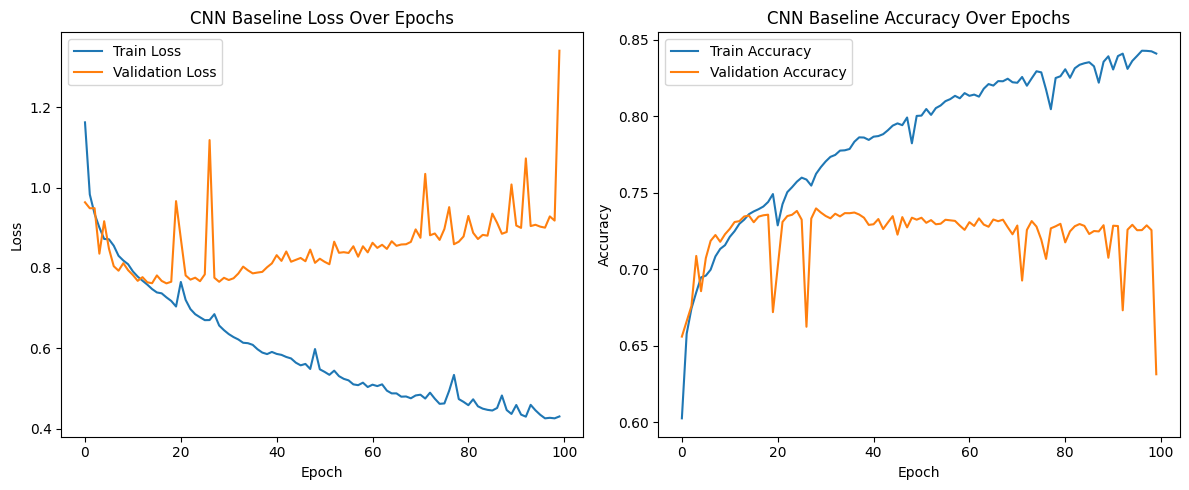

In [13]:
# -------------------------------
# Train the Model (Using Validation Set) and Plot Training History
# -------------------------------
'''history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks_list,
    shuffle=True,
    validation_data=(X_val, y_val)
)'''

# Plot Training History: Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Baseline Loss Over Epochs')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Baseline Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/My Drive/ec523 project/figure_result/CNN_Baseline_Affectnet_loss_and_accuracy_plot.png')
plt.show()
plt.close()

In [14]:
# Evaluate the Model on Test Set and Plot Confusion Matrix
# -------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("CNN Baseline Test loss:", test_loss, "CNN Baseline Test accuracy:", test_acc)
# Evaluate the Model on Test Set and Plot Confusion Matrix
# -------------------------------
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=1)
print("CNN Baseline Val loss:", test_loss, "CNN Baseline Val accuracy:", test_acc)


1349/1349 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6225 - loss: 1.3790
CNN Baseline Test loss: 1.3545013666152954 CNN Baseline Test accuracy: 0.6298090219497681
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6328 - loss: 1.3294
CNN Baseline Val loss: 1.3545013666152954 CNN Baseline Val accuracy: 0.6298090219497681


1349/1349 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


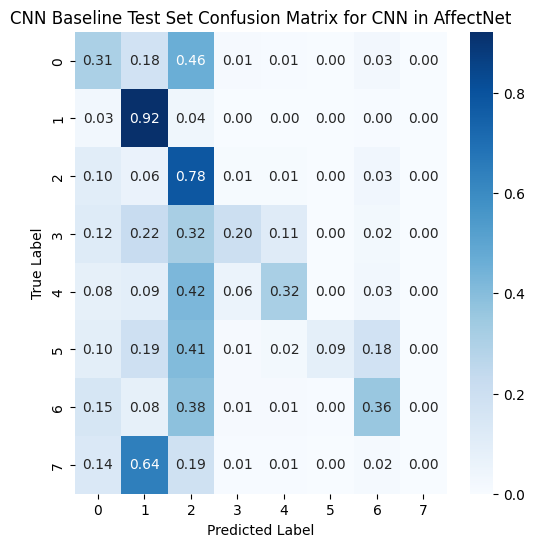

In [15]:
# -------------------------------
# Evaluate the Model on Test Set and Plot Confusion Matrix
# -------------------------------
#test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
#print("Test loss:", test_loss, "Test accuracy:", test_acc)

# Generate Predictions for Confusion Matrix
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_true, y_test_pred_classes, normalize='true')
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')
plt.title("CNN Baseline Test Set Confusion Matrix for CNN in AffectNet")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('/content/drive/My Drive/ec523 project/figure_result/CNN_Baseline_Affectnet_confusion_matrix.png')
plt.show()
plt.close()

In [16]:
# -------------------------------
# Save the Final Model
# -------------------------------
model.save("/content/drive/My Drive/ec523 project/models/AffectNet_CNN_Baseline_best_model.h5")
print("Model saved as AffectNet_CNN_Baseline_best_model.h5")

Model saved as AffectNet_CNN_Baseline_best_model.h5
